## Change in top 4 military spenders

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carrega os dados da planilha militaryexpenditures.csv
milexp_df = pd.read_csv('./military_expenditure/militaryexpenditure.csv', sep=';')

# Exclui as regiões classificadas como "Regions Clubbed Economically" por serem muito generalistas
milexp_df = milexp_df[~milexp_df['Type'].isin(['Regions Clubbed Economically'])]

# Exclui as regiões "World", "North America" e "Middle income" por serem muito generalistas
milexp_df = milexp_df.loc[~milexp_df['Name'].isin(['World', 'North America', 'Middle income'])]

In [3]:
# Retorna o n-ésimo maior gastador militar em cada ano.
def n_maior_gastador(df, n):

    df['Rank'] = df.groupby('year')['Valor'].rank(method='dense', ascending=False)
    n_maior = df.loc[df['Rank'] == n]
    return n_maior

# 5 maiores gastadores militares 
first_spender = n_maior_gastador(milexp_df.copy(), 1)
second_spender = n_maior_gastador(milexp_df.copy(), 2)
third_spender = n_maior_gastador(milexp_df.copy(), 3)
fourth_spender = n_maior_gastador(milexp_df.copy(), 4)

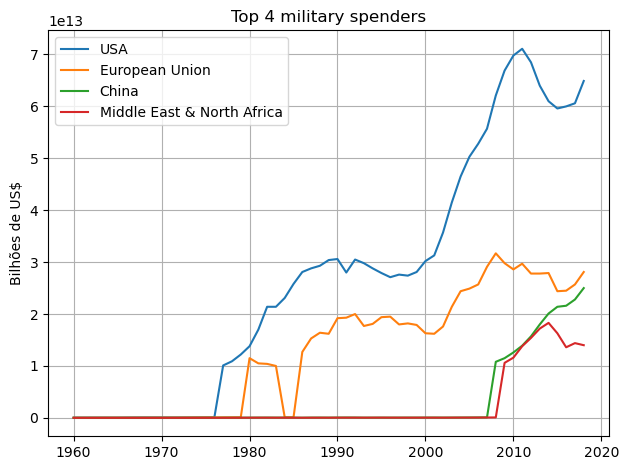

In [4]:
# Gráfico com os 5 maiores gastadores militares desde 1960

plt.plot(first_spender.sort_values(by=['year'])['year'], first_spender.sort_values(by=['year'])['Valor'])
plt.plot(second_spender.sort_values(by=['year'])['year'], second_spender.sort_values(by=['year'])['Valor'])
plt.plot(third_spender.sort_values(by=['year'])['year'], third_spender.sort_values(by=['year'])['Valor'])
plt.plot(fourth_spender.sort_values(by=['year'])['year'], fourth_spender.sort_values(by=['year'])['Valor'])
plt.ylabel('Bilhões de US$')
plt.title('Top 4 military spenders')
plt.grid(True)
plt.tight_layout()
plt.legend(['USA', 'European Union', 'China', 'Middle East & North Africa'])
plt.show()

## Relation between nuclear tests and increase of own nuclear arsenal

In [46]:
df_tests = pd.read_csv('nuclear_explosion/nuclear_explosions_202403110030.csv')
df_arsenal = pd.read_csv('./nuclear_weapon/nuclear_weapons_stockpiles.csv')

In [125]:
tests_stockpile_df = df_tests.merge(df_arsenal, left_on=['WEAPON_SOURCE_COUNTRY','Date.Year'], right_on=['country_name', 'year']).sort_values(by=['year'])
tests_stockpile_df.head()

,WEAPON_SOURCE_COUNTRY,WEAPON DEPLOYMENT LOCATION,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year,country_name,year,nuclear_weapons_stockpile
1003,United States,Alamogordo,DOE,32.54,-105.57,0,0,-0.10,21,21,Wr,Trinity,Tower,16,7,1945,United States,1945,2
1004,United States,Hiroshima,DOE,34.23,132.27,0,0,-0.60,15,15,Combat,Littleboy,Airdrop,5,8,1945,United States,1945,2
1005,United States,Nagasaki,DOE,32.45,129.52,0,0,-0.60,21,21,Combat,Fatman,Airdrop,9,8,1945,United States,1945,2
1006,United States,Bikini,DOE,11.35,165.20,0,0,-0.20,21,21,We,Able,Airdrop,30,6,1946,United States,1946,9
1007,United States,Bikini,DOE,11.35,165.20,0,0,0.03,21,21,We,Baker,Uw,24,7,1946,United States,1946,9


In [119]:
usa = tests_stockpile_df[tests_stockpile_df["country_name"].str.contains('United States')].groupby(by=['year']).count().filter(['country_name','nuclear_weapons_stockpile'])
usa = usa.rename(columns={'country_name':'nuclear_tests'})
usa = usa.drop(columns='nuclear_weapons_stockpile')
usa = usa.reset_index()
usa = usa.join(df_arsenal[df_arsenal["country_name"].str.contains('United States')].set_index('year'), how='left', on='year')
usa.head()

,year,nuclear_tests,country_name,nuclear_weapons_stockpile
0,1945,3,United States,2
1,1946,2,United States,9
2,1948,3,United States,50
3,1951,16,United States,438
4,1952,10,United States,841


In [123]:
china = tests_stockpile_df[tests_stockpile_df["country_name"].str.contains('China')].groupby(by=['year']).count().filter(['country_name','nuclear_weapons_stockpile'])
china = china.rename(columns={'country_name':'nuclear_tests'})
china = china.drop(columns='nuclear_weapons_stockpile')
china = china.reset_index()
china = china.join(df_arsenal[df_arsenal["country_name"].str.contains('China')].set_index('year'), how='left', on='year')
china.head()

,year,nuclear_tests,country_name,nuclear_weapons_stockpile
0,1964,1,China,1
1,1965,1,China,5
2,1966,3,China,20
3,1967,2,China,25
4,1968,1,China,35


In [124]:
russia = tests_stockpile_df[tests_stockpile_df["country_name"].str.contains('Russia')].groupby(by=['year']).count().filter(['country_name','nuclear_weapons_stockpile'])
russia = russia.rename(columns={'country_name':'nuclear_tests'})
russia = russia.drop(columns='nuclear_weapons_stockpile')
russia = russia.reset_index()
russia = russia.join(df_arsenal[df_arsenal["country_name"].str.contains('Russia')].set_index('year'), how='left', on='year')
russia.head()

,year,nuclear_tests,country_name,nuclear_weapons_stockpile
0,1949,1,Russia,1
1,1951,2,Russia,25
2,1953,5,Russia,120
3,1954,10,Russia,150
4,1955,6,Russia,200


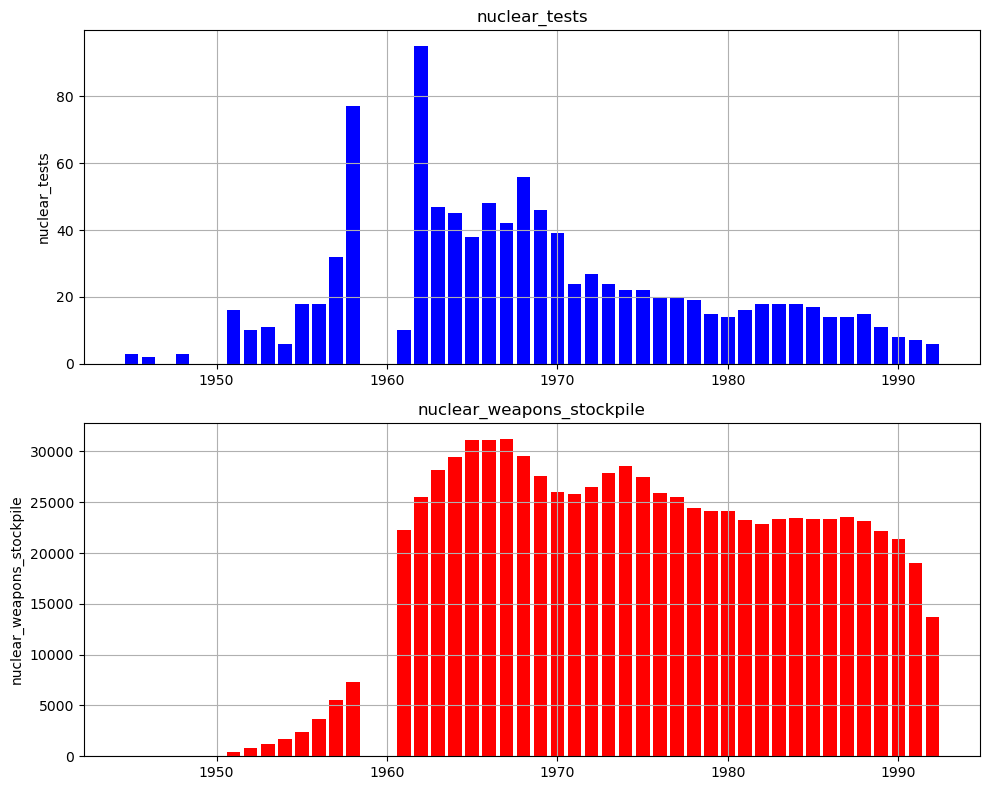

In [146]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].bar(usa['year'], usa['nuclear_tests'], color='b')
axs[0].set_ylabel('nuclear_tests')
axs[1].bar(usa['year'], usa['nuclear_weapons_stockpile'], color='r')
axs[1].set_ylabel('nuclear_weapons_stockpile')
axs[0].set_title('nuclear_tests')
axs[1].set_title('nuclear_weapons_stockpile')
axs[0].grid(True)
axs[1].grid(True)
plt.tight_layout()
plt.show()

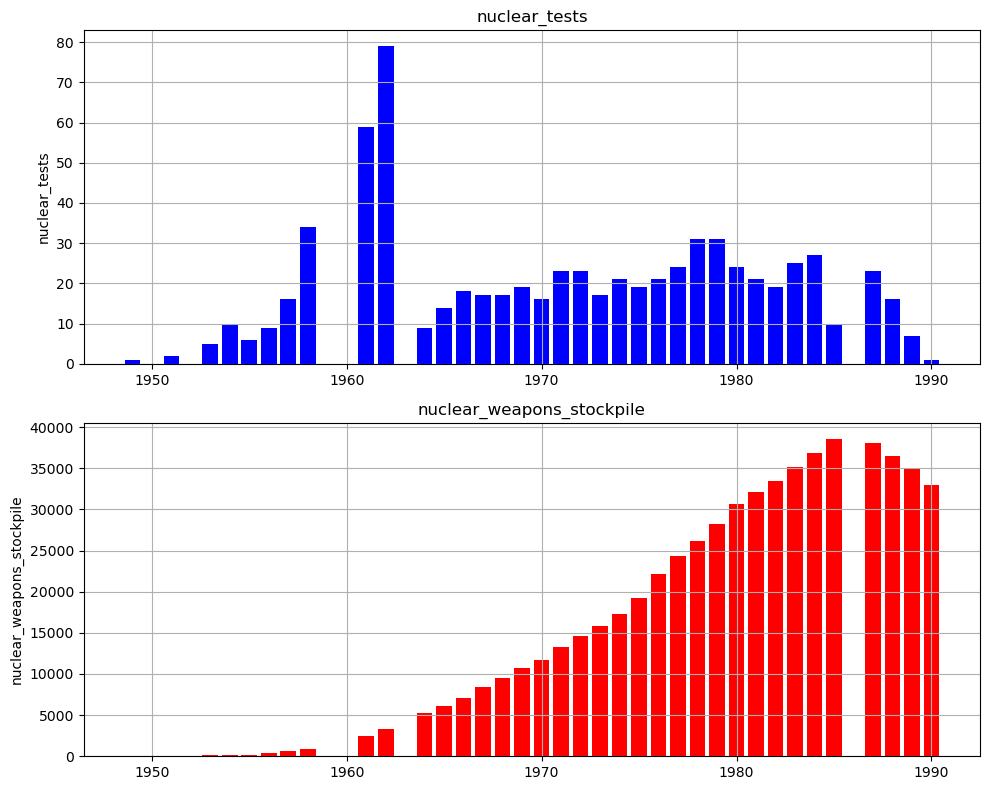

In [145]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].bar(russia['year'], russia['nuclear_tests'], color='b')
axs[0].set_ylabel('nuclear_tests')
axs[1].bar(russia['year'], russia['nuclear_weapons_stockpile'], color='r')
axs[1].set_ylabel('nuclear_weapons_stockpile')
axs[0].set_title('nuclear_tests')
axs[1].set_title('nuclear_weapons_stockpile')
axs[0].grid(True)
axs[1].grid(True)
plt.tight_layout()
plt.show()

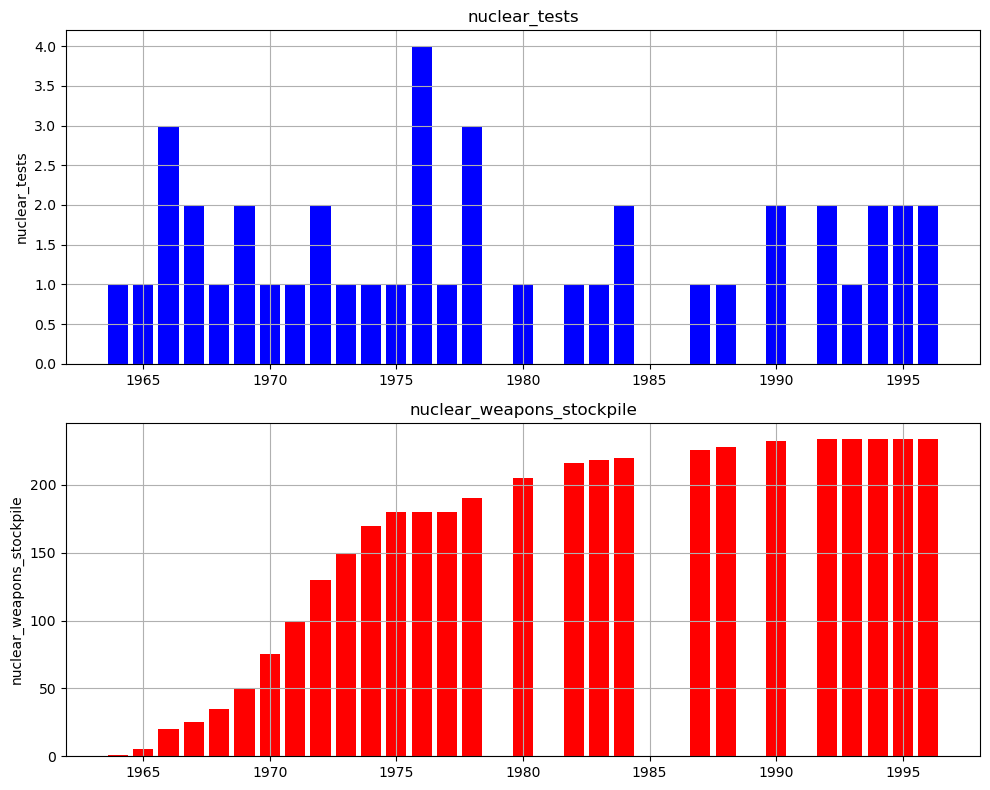

In [144]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].bar(china['year'], china['nuclear_tests'], color='b')
axs[0].set_ylabel('nuclear_tests')
axs[1].bar(china['year'], china['nuclear_weapons_stockpile'], color='r')
axs[1].set_ylabel('nuclear_weapons_stockpile')
axs[0].set_title('nuclear_tests')
axs[1].set_title('nuclear_weapons_stockpile')
axs[0].grid(True)
axs[1].grid(True)
plt.tight_layout()
plt.show()

Seeing the graphs above, it's possible to see that it was usual for nations to carry a substantial number of tests early in the development of their nuclear capabilities but then tended to stabilize the number of tests, only using to test new advancements.
Note 1: No tests have been carried out in the 21st century.
Note 2: The missing entries in the graphs are due to those nations having no tests carried out in those years.